<a href="https://colab.research.google.com/github/rghmf/Cursos-Azure/blob/main/series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
pd.read_csv('alucar.csv').head

<bound method NDFrame.head of            mes  vendas
0   2017-01-31      10
1   2017-02-28      20
2   2017-03-31      33
3   2017-04-30      47
4   2017-05-31      63
5   2017-06-30      81
6   2017-07-31     101
7   2017-08-31     124
8   2017-09-30     148
9   2017-10-31     174
10  2017-11-30     201
11  2017-12-31     230
12  2018-01-31     261
13  2018-02-28     293
14  2018-03-31     326
15  2018-04-30     362
16  2018-05-31     400
17  2018-06-30     440
18  2018-07-31     483
19  2018-08-31     527
20  2018-09-30     573
21  2018-10-31     621
22  2018-11-30     670
23  2018-12-31     721>

In [4]:
alucar = pd.read_csv('alucar.csv')

In [5]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [6]:
print(alucar.shape)

(24, 2)


In [7]:
print(alucar.isna().sum().sum())

0


In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [11]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [14]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [15]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 20.6 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [16]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
%matplotlib inline

In [18]:
from matplotlib import pyplot as plt

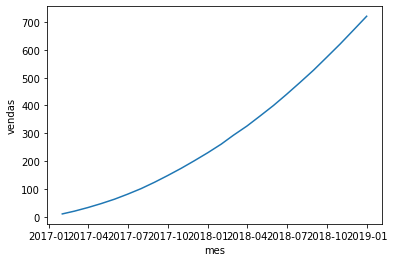

In [21]:
sns.lineplot(x='mes',
             y='vendas', 
             data=alucar)

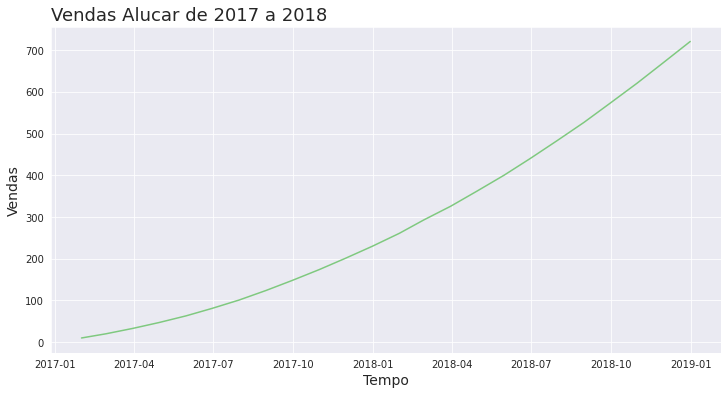

In [30]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax= sns.lineplot(x='mes',
                 y='vendas', 
                 data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 a 2018', 
             loc='left', 
             fontsize=18)
ax.set_xlabel('Tempo', 
              fontsize=14)
ax.set_ylabel('Vendas', 
              fontsize=14)
ax = ax

In [31]:
alucar['aumento'] = alucar['vendas'].diff()

In [33]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


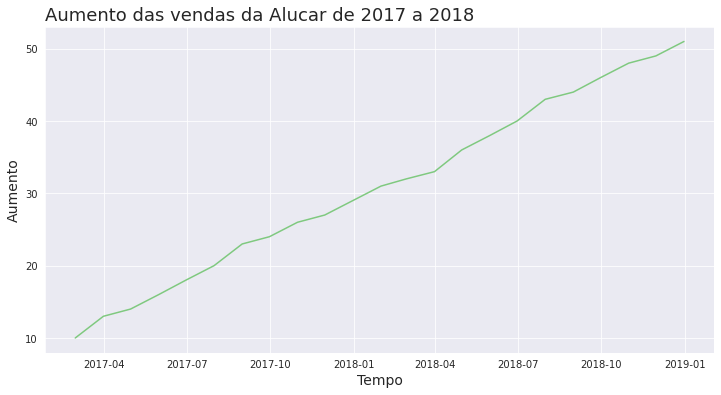

In [34]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax= sns.lineplot(x='mes',
                 y='aumento', 
                 data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 a 2018', 
             loc='left', 
             fontsize=18)
ax.set_xlabel('Tempo', 
              fontsize=14)
ax.set_ylabel('Aumento', 
              fontsize=14)
ax = ax

In [38]:
def plotar(titulo, labelx, labelym, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax= sns.lineplot(x=x,
                   y=y, 
                   data=dataset)
  ax.figure.set_size_inches(12,6)
  x.set_title(titulo, 
              loc='left', 
              fontsize=18)
  ax.set_xlabel(labelx, 
                fontsize=14)
  ax.set_ylabel(labely, 
                fontsize=14)
  ax = ax

In [40]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


In [41]:
from pandas.plotting import autocorrelation_plot

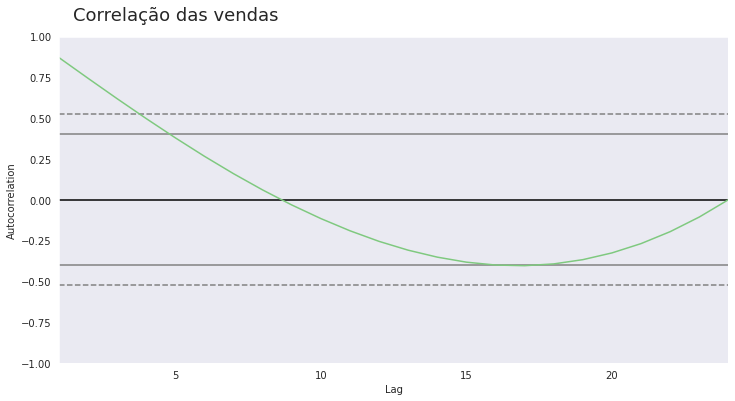

In [46]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

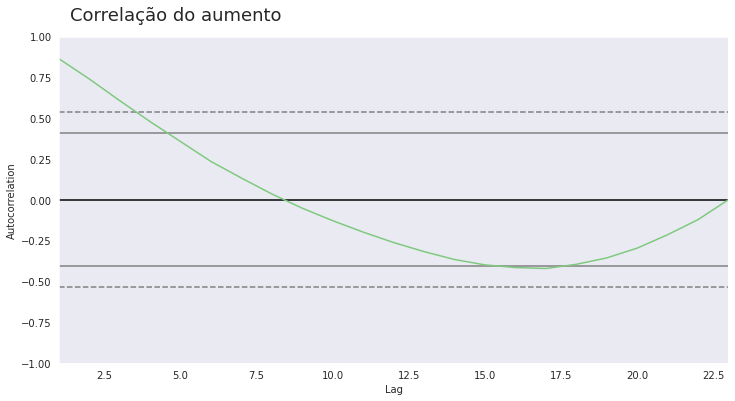

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

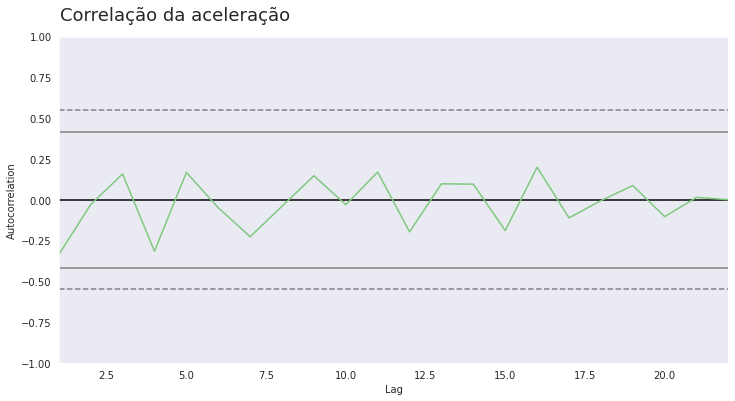

In [49]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [50]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [52]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [53]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [54]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [59]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [61]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [62]:
chocolura = pd.read_csv('chocolura.csv')

In [63]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [64]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [65]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [66]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [67]:
chocolura.isna().sum().sum()

0

In [68]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [69]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [70]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')

In [71]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [72]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [75]:
#fiquei com preguiça de fazer a função inteira e agora nao consigo fazer os gráficos, triste